## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page [summary](https://docs.google.com/presentation/d/1bdJE_ErhrTySCiGTgpAS-TD9Rs-j_FWYg51PX_DPkYg/edit?usp=sharing&resourcekey=0-ghqcaAkRFeS23YosCCquGA) of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


PACE stages



*   [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
*   [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
* [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
* [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

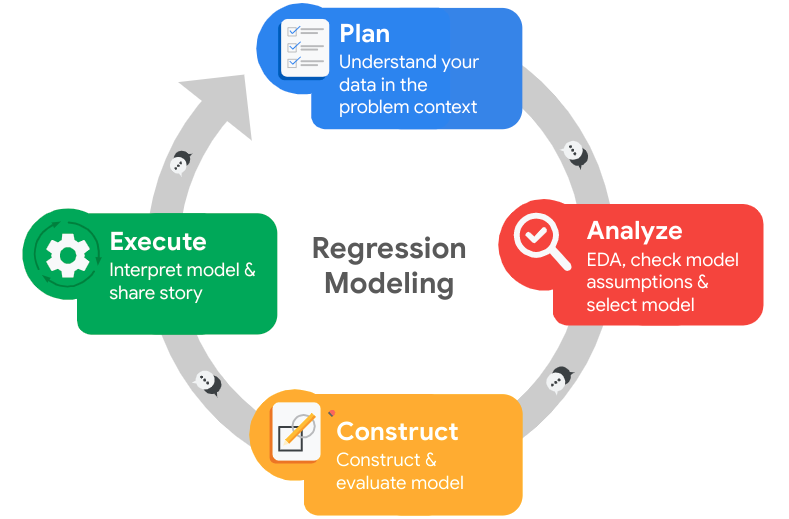



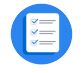

# Pace: Plan Stage

- Understand your data in the problem context
- Consider how your data will best address the business need
- Contextualize & understand the data and the problem


🗒
### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



In [33]:
!pip install xgboost

### Import packages

In [34]:
# Import packages
### YOUR CODE HERE ###
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)


from xgboost import XGBClassifier, XGBRegressor, plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score \
	, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.tree import plot_tree



### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [35]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head(10)
### YOUR CODE HERE ###


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [36]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [37]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [38]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [47]:
# Rename columns as needed
### YOUR CODE HERE ###

df0.rename(columns={
	"Work_accident":'work_accident',
	"time_spend_company": 'tenure',
	"Department": 'department'
}, inplace=True)
# Display all column names after the update
### YOUR CODE HERE ###
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check missing values

Check for any missing values in the data.

In [40]:
# Check for missing values
### YOUR CODE HERE ###

df0.isna().sum()


satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [41]:
# Check for duplicates
### YOUR CODE HERE ###
df0.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
14994     True
14995     True
14996     True
14997     True
14998     True
Length: 14999, dtype: bool

In [42]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###
df0.duplicated().sum()

3008

In [43]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###
df0[df0.duplicated()].head()

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

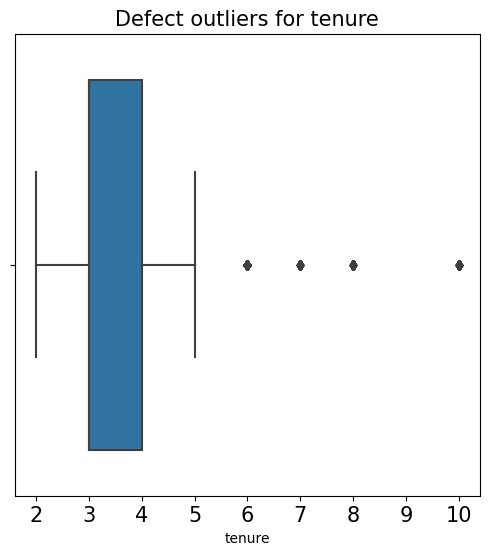

In [44]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

plt.figure(figsize=(6,6))
plt.title('Defect outliers for tenure', fontsize=15)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
sns.boxplot(x=df1['tenure'])
plt.show()



In [45]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###
# 25 percentile of value
percent_25 = df1['tenure'].quantile(0.25)

# 75 percentile of value
percent_75 = df1['tenure'].quantile(0.75)

# calculate range of interquatile
iqr = percent_75 - percent_25

# define upper and lower limit
upper_limit = percent_75 + (1 * iqr)
lower_limit = percent_25 - (1 * iqr)

print(upper_limit)
print(lower_limit)

#define outliers
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)] 

print(outliers)


5.0
2.0
       satisfaction_level  last_evaluation  number_project  \
1                    0.80             0.86               5   
17                   0.78             0.99               4   
34                   0.84             0.87               4   
47                   0.57             0.70               3   
67                   0.90             0.98               4   
...                   ...              ...             ...   
11994                0.22             0.94               3   
11995                0.90             0.55               3   
11996                0.74             0.95               5   
11997                0.85             0.54               3   
11998                0.33             0.65               3   

       average_montly_hours  tenure  work_accident  left  \
1                       262       6              0     1   
17                      255       6              0     1   
34                      246       6              0     1   
47     

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

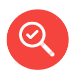
# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

In [49]:
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Data visualizations

Now, start examining the variables that you're interested in, and create plots to visualize relationships between variables in the data.

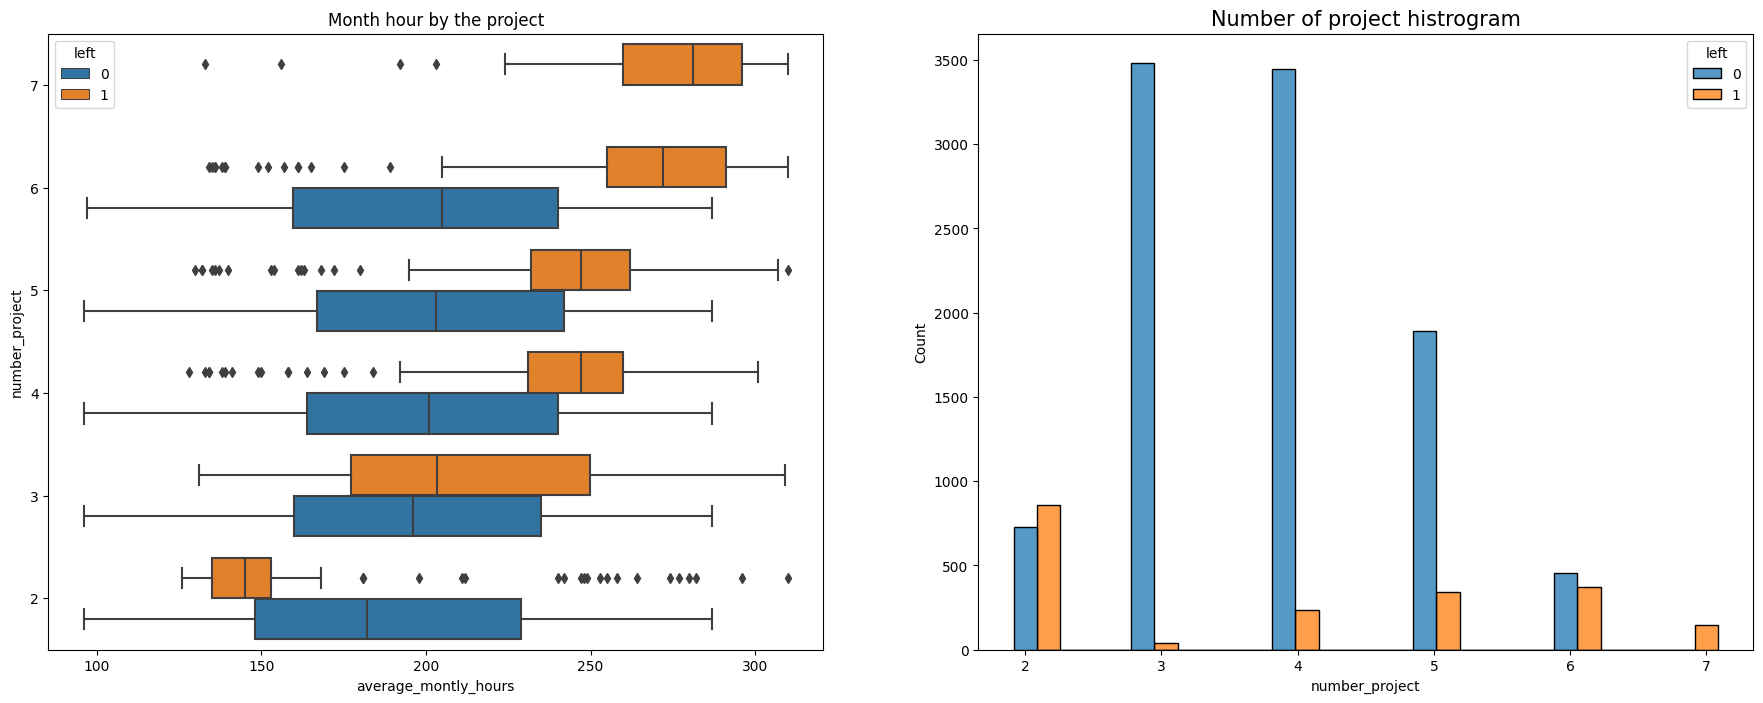

In [50]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize=(22, 8))

# create box plot
sns.boxplot(data=df1, x = "average_montly_hours", y = 'number_project', hue='left', orient='h', ax = ax[0])

ax[0].invert_yaxis()
ax[0].set_title('Month hour by the project')

# create histrogram
tenure_stay = df1[df1['left'] == 0]['number_project']
tenure_left = df1[df1['left'] == 1]['number_project']
sns.histplot(data = df1, x = 'number_project', hue='left', multiple='dodge', shrink=2, ax = ax[1]  )

ax[1].set_title('Number of project histrogram', fontsize = 15)

# displat plot and remove object header
plt.show()


In [51]:
# get value counts of stayed/left
df1[df1['number_project'] == 7]['left'].value_counts()

1    145
Name: left, dtype: int64

Text(0.5, 1.0, 'Monthly hours by evaluation score')

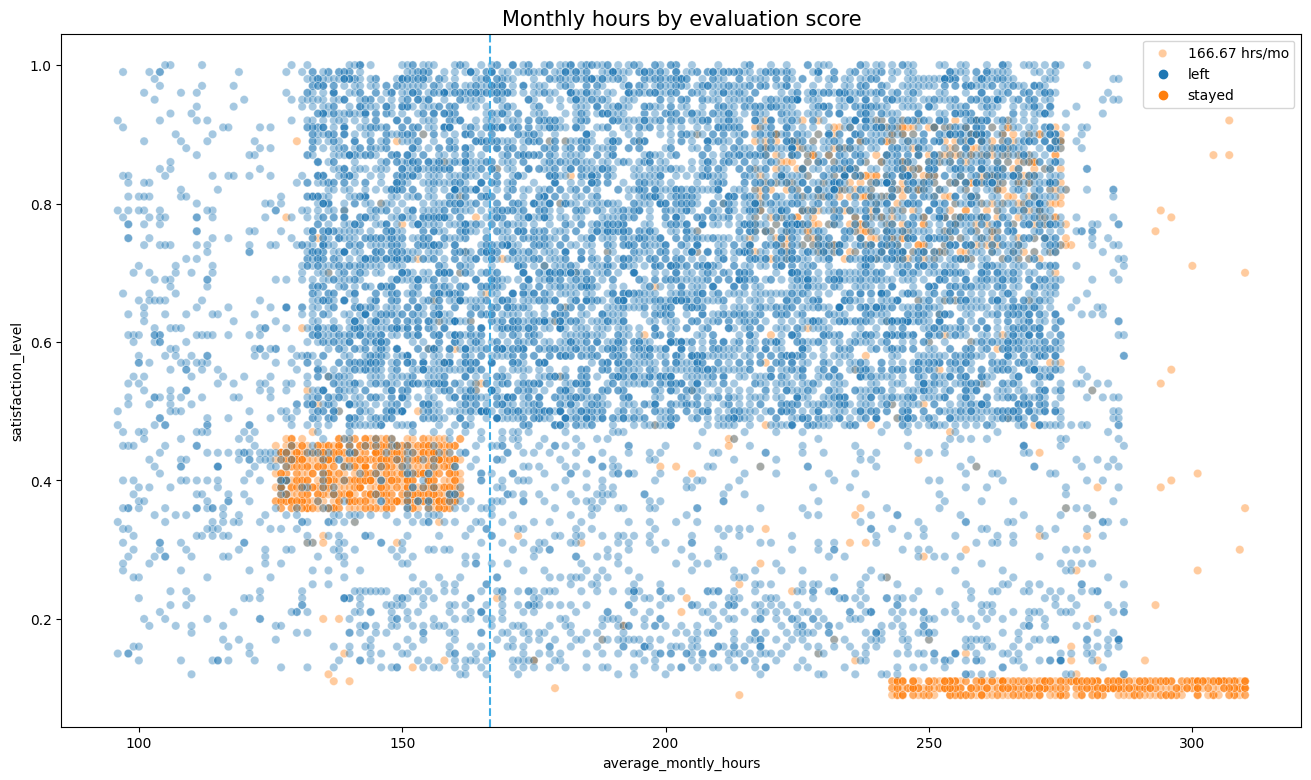

In [52]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df1, x = 'average_montly_hours', y = 'satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x = 166.67, color='#40ade5', label="166.67 hrs/mo", ls='--')
plt.legend(labels=['166.67 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by evaluation score', fontsize = 15)

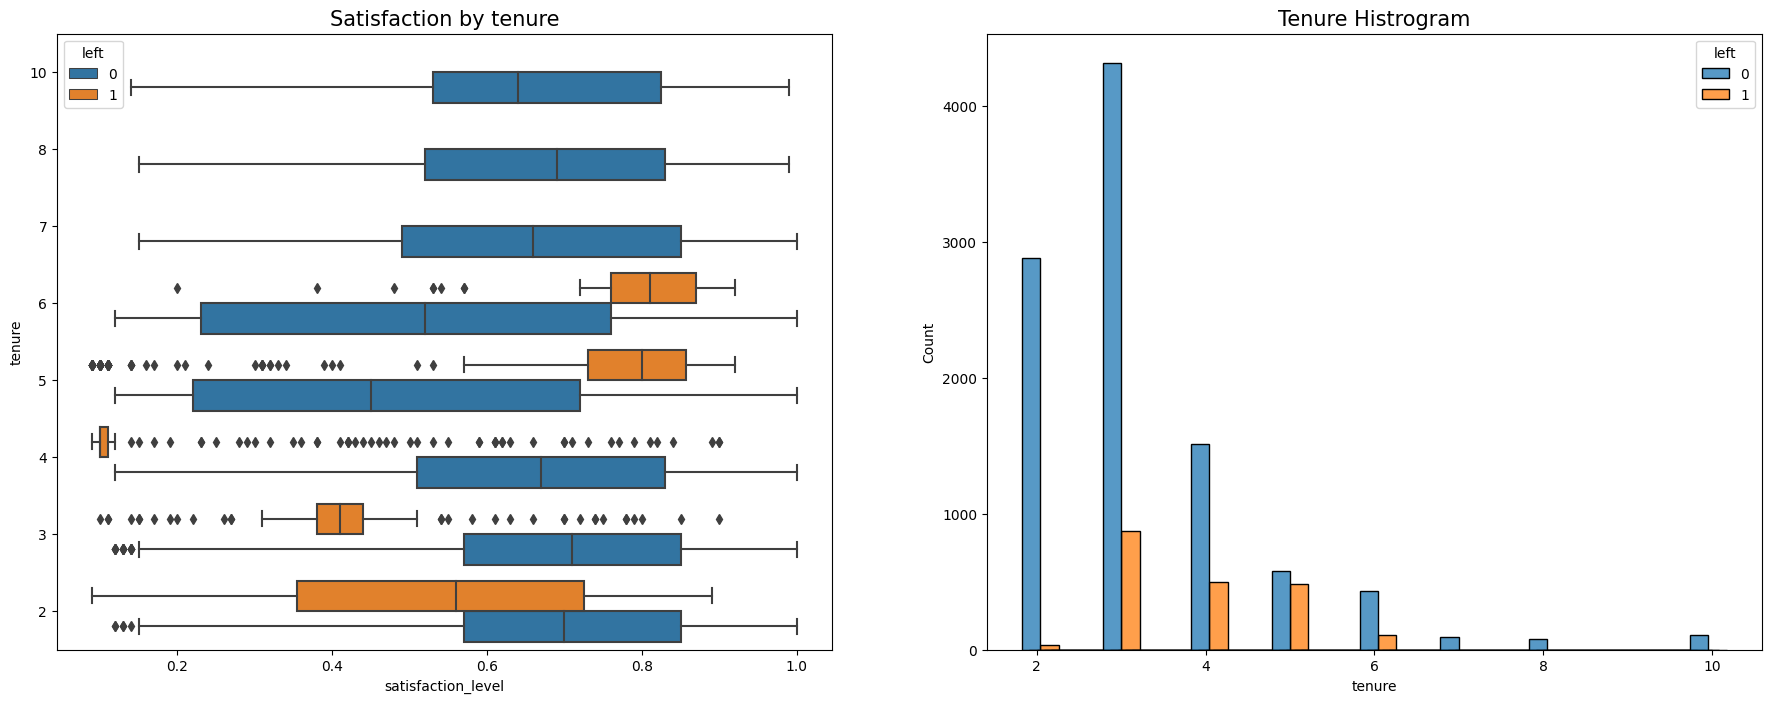

In [54]:
# Create a plot as needed
### YOUR CODE HERE ###
fig, ax = plt.subplots(1, 2, figsize = (22, 8))

#create boxplot of satisfaction_level
sns.boxplot(data=df1, x = 'satisfaction_level', y = 'tenure', hue='left' , orient='h', ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize = 15)

#create histrogram with tenure  comparing to employee
#split `stayed` & `left`
tenure_stayed = df1[df1['left'] == 0]['tenure']
tenure_left = df1[df1['left'] == 1]['tenure']

sns.histplot(data= df1, x = 'tenure', hue = 'left', multiple='dodge', shrink=5, ax = ax[1])
ax[1].set_title("Tenure Histrogram", fontsize =15)

plt.show()

In [56]:
# calculate mean and median of satisfaction_level score
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median]).reset_index()

,left,mean,median
0,0,0.667365,0.69
1,1,0.440271,0.41


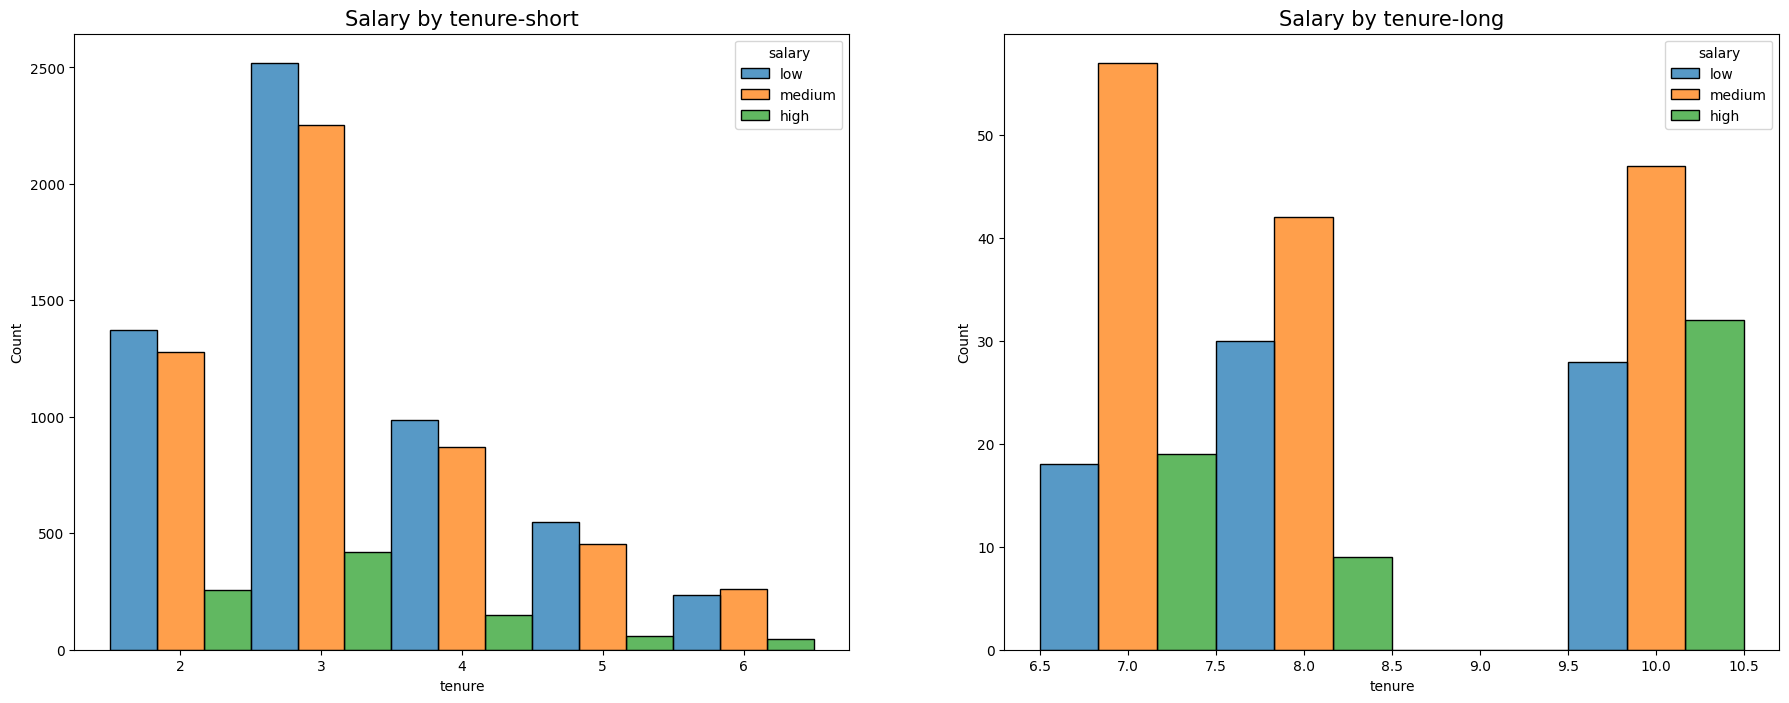

In [62]:
# Create a plot as needed 
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# define short and long to employee
tenure_short = df1[df1['tenure'] < 7]
tenure_long = df1[df1['tenure'] > 6]


#create hist plot of tenure_short
sns.histplot(data = tenure_short, x = 'tenure', hue = 'salary', discrete= 1, hue_order=['low', 'medium', 'high'], multiple='dodge', \
	ax = ax[0])

ax[0].set_title("Salary by tenure-short", fontsize= 15)

#create hist plot of tenure_long
sns.histplot(data = tenure_long, x = 'tenure', hue = 'salary', discrete= 1, hue_order=['low', 'medium', 'high'], multiple='dodge',\
	ax = ax[1])

ax[1].set_title("Salary by tenure-long", fontsize= 15 )

plt.show()

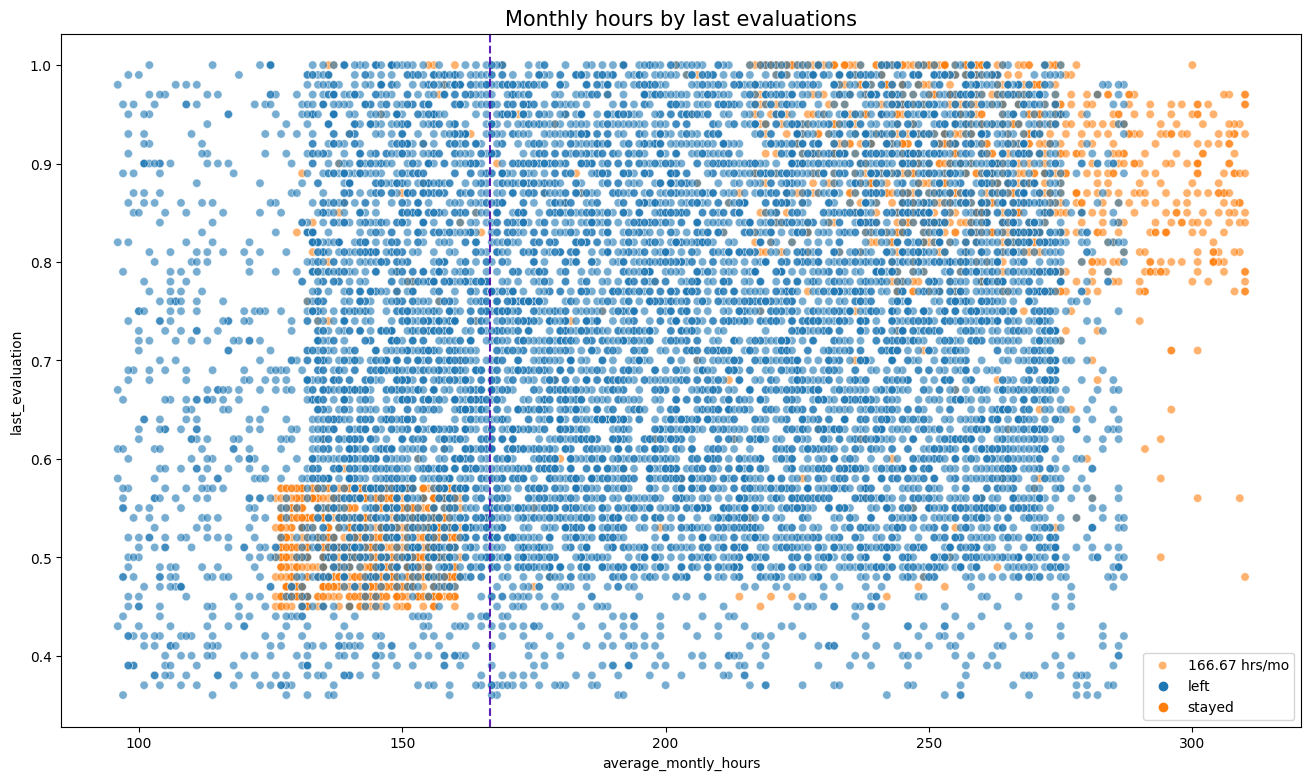

In [66]:
# Create a plot as needed
### YOUR CODE HERE ##
#create scatterplot of average_monthly vs last_evaluation
plt.figure(figsize=(16, 9))

sns.scatterplot(data = df1, x = 'average_montly_hours', y = 'last_evaluation', hue='left', alpha = 0.6)

plt.axvline(x = 166.67, color="#40ad", label = '166.67 hrs/mo', ls= '--')
plt.legend(labels=['166.67 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by last evaluations', fontsize = 15)
plt.show()

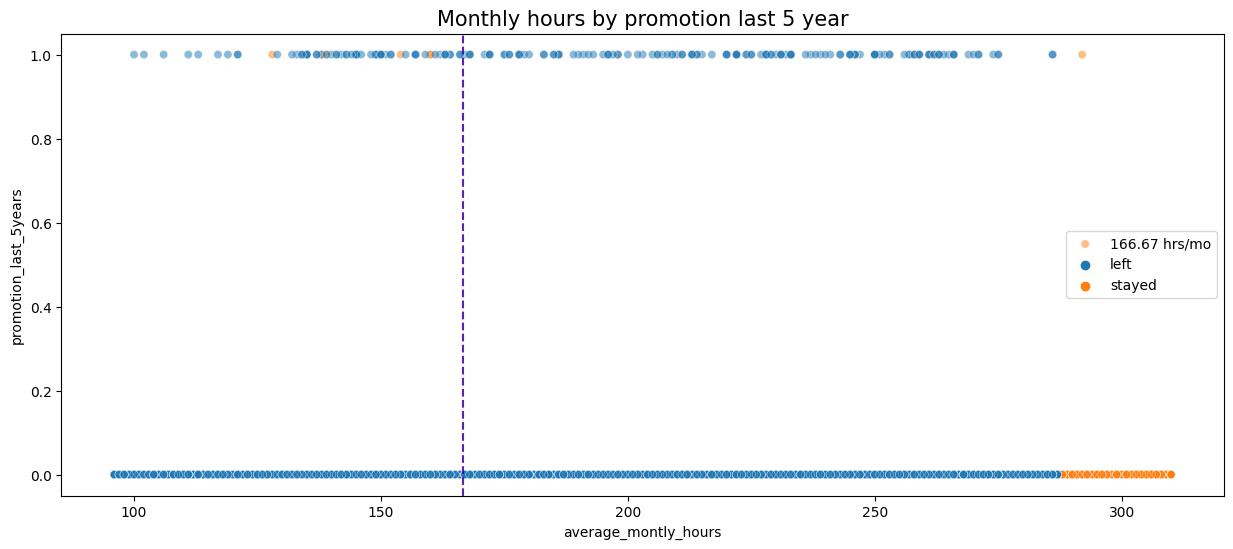

In [72]:
# Create a plot as needed
### YOUR CODE HERE ###

#create plot to examine relationship between average_monthly and promotion_5last_year

plt.figure(figsize = (15, 6))

sns.scatterplot(data = df1, x = 'average_montly_hours', y = 'promotion_last_5years', hue='left', alpha = 0.5)

plt.axvline(x = 166.67, color="#40ad", label = '166.67 hrs/mo', ls= '--')
plt.legend(labels=['166.67 hrs/mo', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 year', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Count of stayed/left by Department')

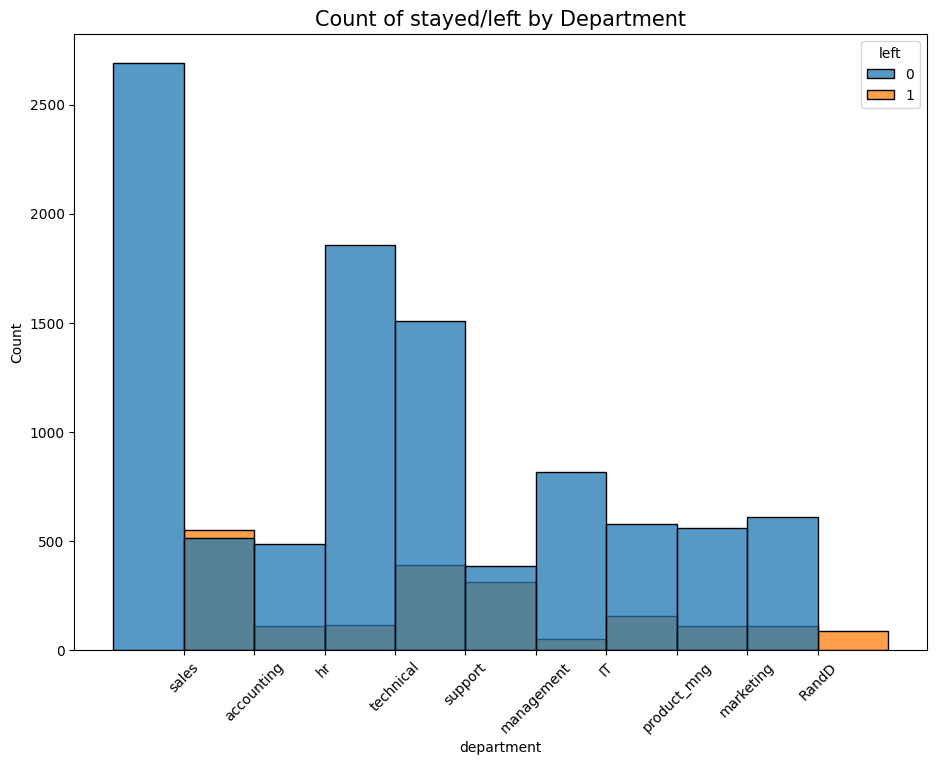

In [79]:
# Create a plot as needed
### YOUR CODE HERE ###
plt.figure(figsize=(11, 8))
sns.histplot(data = df1, x = 'department', hue = 'left', discrete=1, hue_order=[0, 1], multiple='dodge', shrink =2)
plt.xticks(rotation = 45)
plt.title('Count of stayed/left by Department', fontsize = 15)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15892\2285925522.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df1.corr(), vmin=0, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))


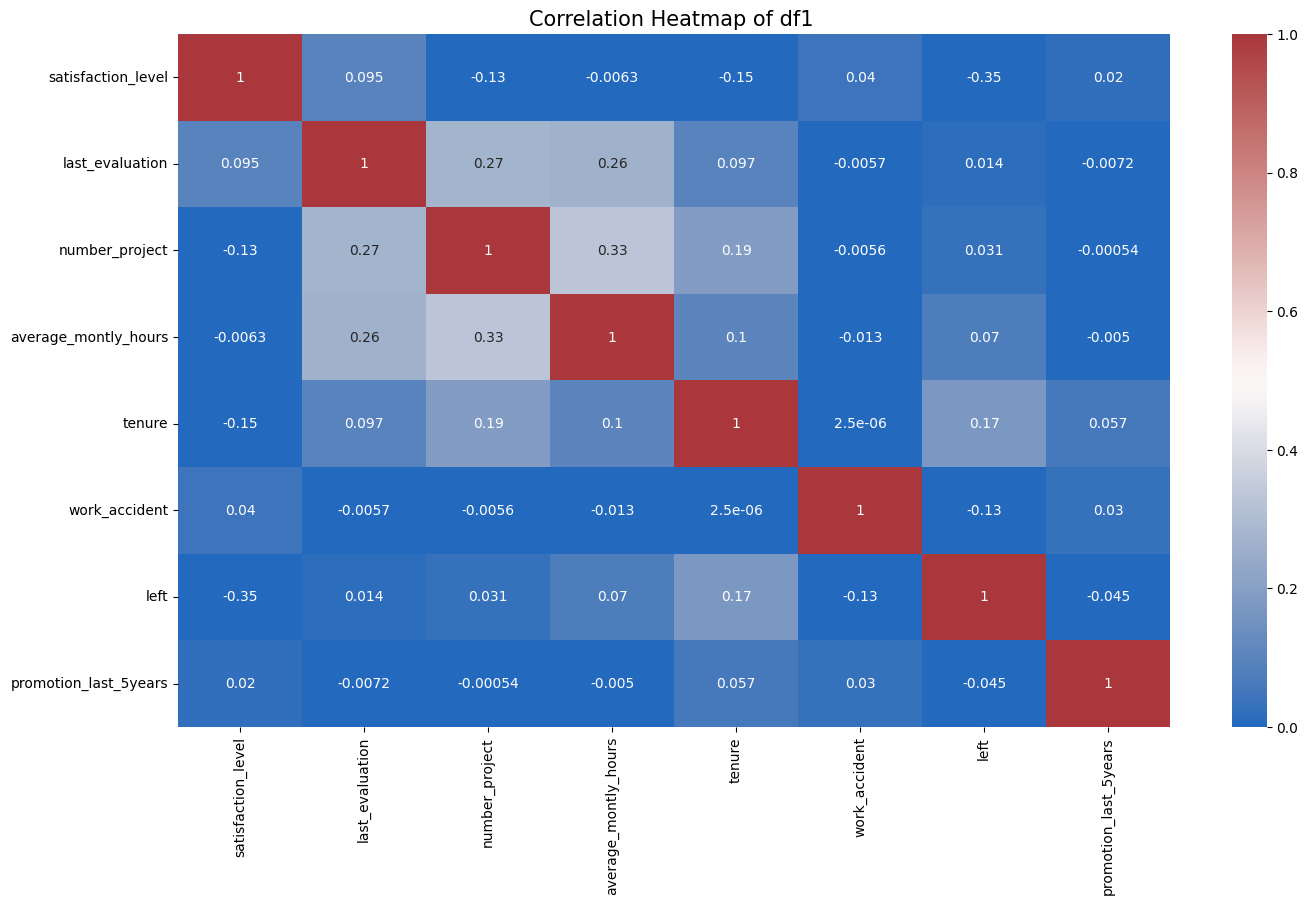

In [90]:
# Create a plot as needed
### YOUR CODE HERE ###

# create correlation heatmap
plt.figure(figsize=(16, 9))

heatmap = sns.heatmap(df1.corr(), vmin=0, vmax=1, annot=True, cmap=sns.color_palette('vlag', as_cmap=True))
heatmap.set_title("Correlation Heatmap of df1 ", fontsize= 15)

plt.show()

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

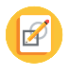
# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

### Modeling

Add as many cells as you need to conduct the modeling process.

In [91]:
### YOUR CODE HERE ###
# use onehot encoding to variable in dataframe
df_enc = pd.get_dummies(df1 , prefix=['salary', 'dept'], columns=['salary', 'department'], drop_first=False)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


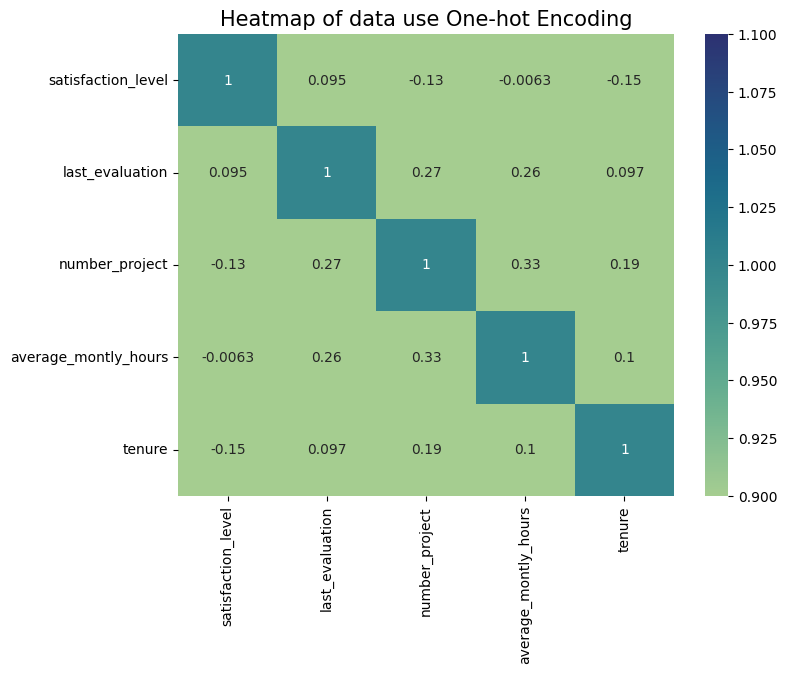

In [94]:
# create heatmap to visualization
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'tenure']].corr(), vmin=1, vmax=1, annot=True, cmap='crest')
plt.title("Heatmap of data use One-hot Encoding", fontsize = 15)
plt.show()

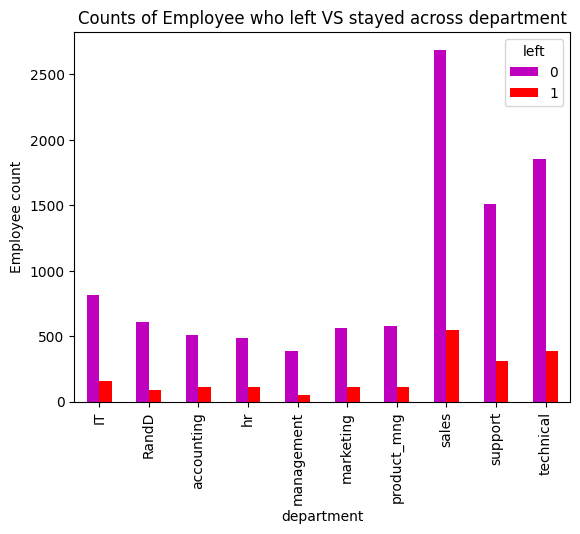

In [95]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
pd.crosstab(df1['department'], df1['left']).plot(kind='bar', color= 'mr'), 
plt.title('Counts of Employee who left VS stayed across department')
plt.ylabel('Employee count')
plt.xlabel('department')
plt.show()

In [96]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,left,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [99]:
# Select the features you want to use in your model
X = df_logreg[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'tenure', 'work_accident', 'promotion_last_5years', 'salary_high', 'salary_low', 'salary_medium' , 'dept_IT', 'dept_RandD', 'dept_accounting', 'dept_hr', 'dept_management', 'dept_marketing', 'dept_product_mng', 'dept_sales', 'dept_support', 'dept_technical']]
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head() 
# Display the first few rows of the selected features 
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,tenure,work_accident,promotion_last_5years,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [100]:
#split data to train
X_train,  X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 6) 

In [101]:
X_train.shape

(8933, 20)

In [103]:
y_train.shape
X_test.shape

(2234, 20)

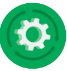
# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



In [104]:
#construct to logistic regression model
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [105]:
#predict data
y_predict = log_clf.predict(X_test)

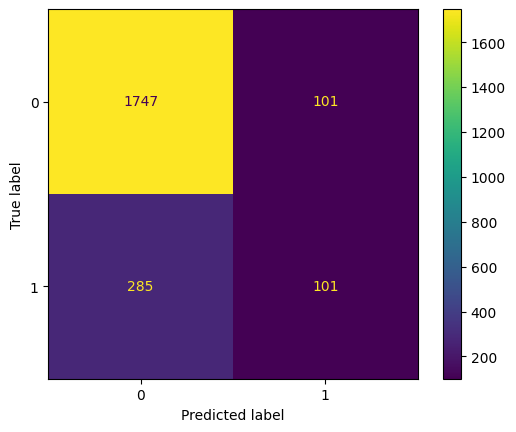

In [106]:
# compute predict and actual test for confusion_matrix
log_cm = confusion_matrix(y_test, y_predict, labels = log_clf.classes_)

#create confusion matrix
log_display = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

#show confusion matrix
log_display.plot()

#plot 
plt.show()

In [107]:
#normalize attr left
df_logreg['left'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left, dtype: float64

In [112]:
#create classification report for logistic model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_predict, target_names=target_names), flush=True)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.95      0.90      1848
    Predicted would leave       0.50      0.26      0.34       386

                 accuracy                           0.83      2234
                macro avg       0.68      0.60      0.62      2234
             weighted avg       0.80      0.83      0.80      2234

